<a href="https://colab.research.google.com/github/tedsetpb/skripsi/blob/main/skripsi_penyakit_padi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### source dataset





In [ ]:
import os
import pandas as pd

mypath= '/content/drive/My Drive/skripsi-semoga/RD2_primerv3'

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()


tag
blast      80
blight     80
healthy    80
tungro     80
dtype: int64

In [ ]:
#cek sample data
df.head()

,path,file_name,tag
0,/content/drive/My Drive/skripsi-semoga/RD2_pri...,IMG_0987.jpg,blight
1,/content/drive/My Drive/skripsi-semoga/RD2_pri...,IMG_0941.jpg,blight
2,/content/drive/My Drive/skripsi-semoga/RD2_pri...,IMG_1075.jpg,blight
3,/content/drive/My Drive/skripsi-semoga/RD2_pri...,IMG_0986.jpg,blight
4,/content/drive/My Drive/skripsi-semoga/RD2_pri...,IMG_1013.jpg,blight



### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [ ]:
#split dataset awal menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, stratify=y, random_state=371)

In [ ]:
#data test dibagi menjadi data test dan data validation
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.25, stratify=y_test, random_state=249)

In [ ]:
#menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
              
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_tr))
print('test size', len(df_te))
print('val size', len(df_val))

train size 64
test size 192
val size 64


In [ ]:
#melihat porsi masing-masing
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample data
df_all.sample(5)


set         tag    
test        blast      48
            blight     48
            healthy    48
            tungro     48
train       blast      16
            blight     16
            healthy    16
            tungro     16
validation  blast      16
            blight     16
            healthy    16
            tungro     16
dtype: int64 




,path,tag,set
66,/content/drive/My Drive/skripsi-semoga/RD2_pri...,blight,test
72,/content/drive/My Drive/skripsi-semoga/RD2_pri...,blast,test
146,/content/drive/My Drive/skripsi-semoga/RD2_pri...,blast,test
303,/content/drive/My Drive/skripsi-semoga/RD2_pri...,tungro,validation
122,/content/drive/My Drive/skripsi-semoga/RD2_pri...,tungro,test


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(64,) (64,)
(192,) (192,)


### Merapihkan ke folder set masing-masing

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
#lokasi dataset yang telah dibuat
datasource_path = "RD2_primerv3/"
dataset_path = "dataset/"

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

## Pre-processing

### resize

In [ ]:
import tensorflow as tf

In [ ]:
# input size
dim = (224, 224)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 30

#learning rate
lr = 0.0001

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 128 images belonging to 4 classes.
Found 135 images belonging to 4 classes.
Found 245 images belonging to 4 classes.


In [ ]:
print(labels)

dict_keys(['blast', 'blight', 'healthy', 'tungro'])


In [ ]:
print(num_class)

4


Membuat tf.data untuk kompabilitas yang lebih baik untuk tensorflow 2.1 (tf.keras)

In [ ]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [ ]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

## Build model cnn

In [ ]:
from tensorflow.keras import layers, Sequential, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, AveragePooling2D, Input, DepthwiseConv2D, SeparableConv2D
from keras.layers.normalization import BatchNormalization
import math  
import datetime
import time

### VGG16

In [ ]:
vgg16 = tf.keras.applications.VGG16(include_top=False,
                                    #weights='imagenet',
                                    input_shape=input_shape,
                                    classes=num_class)

In [ ]:
#Adding custom layers
x = vgg16.layers[-5].output
#x = vgg16.output
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
#x = layers.Dropout(0.25)(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=vgg16.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Compile the model
print('Compiling Model.......')
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


## Visualize architecture model

In [ ]:
import tensorflow as tf

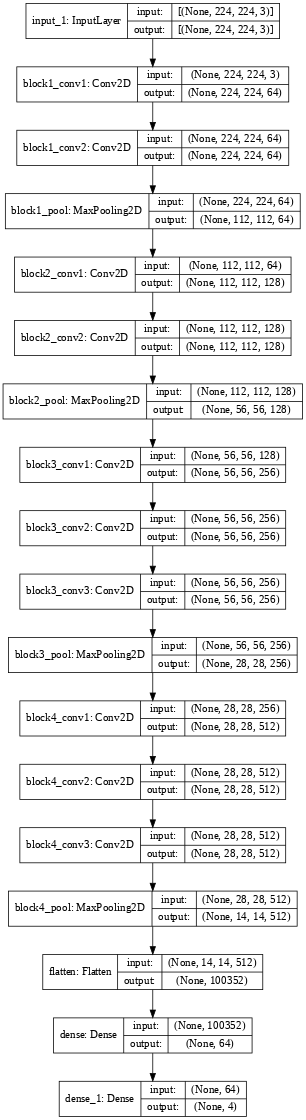

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='xception.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

## Train Model

In [ ]:
start = datetime.datetime.now()

history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=30,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose=1)

end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/30
12/12 [==============================] - 50s 1s/step - loss: 1.9602 - accuracy: 0.3385 - val_loss: 1.2867 - val_accuracy: 0.3125
Epoch 2/30
12/12 [==============================] - 13s 1s/step - loss: 1.0812 - accuracy: 0.4948 - val_loss: 1.1917 - val_accuracy: 0.4375
Epoch 3/30
12/12 [==============================] - 13s 1s/step - loss: 1.0406 - accuracy: 0.5365 - val_loss: 1.0346 - val_accuracy: 0.4375
Epoch 4/30
12/12 [==============================] - 13s 1s/step - loss: 0.7670 - accuracy: 0.6823 - val_loss: 0.6376 - val_accuracy: 0.6250
Epoch 5/30
12/12 [==============================] - 13s 1s/step - loss: 0.7592 - accuracy: 0.6875 - val_loss: 0.5874 - val_accuracy: 0.7812
Epoch 6/30
12/12 [==============================] - 13s 1s/step - loss: 0.4802 - accuracy: 0.8177 - val_loss: 0.3168 - val_accuracy: 0.8750
Epoch 7/30
12/12 [==============================] - 13s 1s/step - loss: 0.3483 - accuracy: 0.8542 - val_loss: 0.1745 - val_accuracy: 0.9062
Epoch 8/30
12/12 [==

In [ ]:
history.history['loss']

[1.960158348083496,
 1.081223726272583,
 1.0406365394592285,
 0.766959011554718,
 0.7591962814331055,
 0.4802228510379791,
 0.348254919052124,
 0.32452723383903503,
 0.274044007062912,
 0.12119994312524796,
 0.5040672421455383,
 0.31252363324165344,
 0.135294109582901,
 0.16212011873722076,
 0.13412092626094818,
 0.14446936547756195,
 0.08401267975568771,
 0.20843718945980072,
 0.16259567439556122,
 0.13764165341854095,
 0.10980672389268875,
 0.05032214894890785,
 0.027727454900741577,
 0.008629716001451015,
 0.035206299275159836,
 0.04382016882300377,
 0.03019551932811737,
 0.003952504601329565,
 0.006819222122430801,
 0.0031509799882769585]

In [ ]:
history.history['accuracy']

[0.3385416567325592,
 0.4947916567325592,
 0.5364583134651184,
 0.6822916865348816,
 0.6875,
 0.8177083134651184,
 0.8541666865348816,
 0.8802083134651184,
 0.9010416865348816,
 0.9635416865348816,
 0.8333333134651184,
 0.9010416865348816,
 0.953125,
 0.9479166865348816,
 0.953125,
 0.953125,
 0.9739583134651184,
 0.953125,
 0.9479166865348816,
 0.953125,
 0.96875,
 0.9739583134651184,
 0.9947916865348816,
 1.0,
 0.9947916865348816,
 0.984375,
 0.984375,
 1.0,
 1.0,
 1.0]

### Plot the training

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: ignored

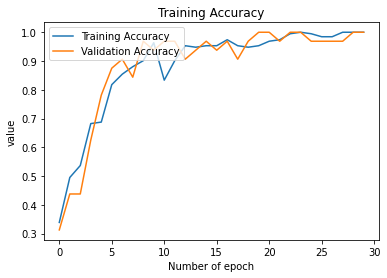

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.ylabel('value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

### Evaluate the Model

In [ ]:
loss, acc = model.evaluate(train_data,steps=len(train_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')

loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

RuntimeError: ignored

### Save Model

In [ ]:
import os

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "skripsi"
SAVE_MODEL_NAME = "VGG16_modified_v6_29may.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

## Load Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/skripsi-semoga/VGG16_modified_v6_100_29may.h5'
model = load_model(MODEL_PATH,compile=False)

## confusion matrix

In [ ]:
from IPython.display import display
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
import numpy as np
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [ ]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int32)

In [ ]:
print('Classification Report')
target_names = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
report = classification_report(target_names, y_pred, target_names=class_labels)
print(report) 

Classification Report
              precision    recall  f1-score   support

       blast       1.00      1.00      1.00        60
      blight       1.00      0.98      0.99        61
     healthy       1.00      1.00      1.00        63
      tungro       0.98      1.00      0.99        61

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



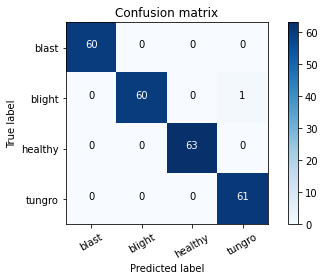

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['blast','blight','healthy','tungro'],
                      title='Confusion matrix')

Normalized confusion matrix


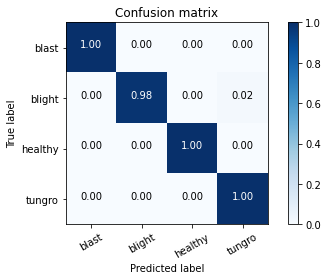

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['blast','blight','healthy','tungro'],
                      title='Confusion matrix')

## Membuat fungsi prediksi

define params and lib

In [ ]:
import requests
from io import BytesIO
import cv2
import math  
import datetime
import time

from PIL import Image
import numpy as np

In [ ]:
# Parameters
input_size1 = (224,224)
#input_size1 = (299,299)
#define input shape
channel = (3,)
input_shape = input_size1 + channel

#define labels
labels = ['blast', 'blight', 'healthy', 'tungro']

define preprocess function

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size1, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

### Predict the image

tungro 0.73984045


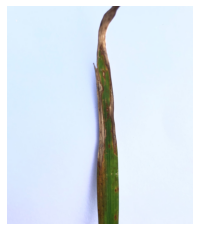

In [ ]:
im = Image.open('/content/dataset/test/blight/IMG_0834.jpg')
X = preprocess(im,input_size1)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y))
fig = plt.imshow(im)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

## show augmented image


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

x = io.imread('/content/dataset/train/blast/IMG_0448.jpg')
x = x.reshape((1, ) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=16,
                                save_to_dir='/content/dataset/augmented',
                                save_prefix='aug',
                                save_format='jpg'): 
  i += 1    
  if i > 6:        
     break

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224))
    image = preprocess(image, input_shape)
    image = reshape(image)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    #image = image.reshape(1, 224, 224, 3)
    return image

In [ ]:
def test_single_image(path):
    diseases = ['blast', 'blight', 'healthy', 'tungro']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = model.predict(images) 
    #preds = model.predict(bt_prediction)
    for idx, diseases, x in zip(range(0,6), diseases, bt_prediction[0]):
        print("ID: {}, Label: {} {}%".format(idx, diseases, round(x*100,2)))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict(bt_prediction)
    class_dictionary = generator_top.class_indices 
    inv_map = {v: k for k, v in class_dictionary.items()} 
    print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
    return load_img(path)

In [ ]:
path = '/content/dataset/test/blight/IMG_1002.jpg'

In [ ]:
test_single_image(path)

In [ ]:
plt.imshow(path)

## show filter

In [ ]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

In [ ]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [ ]:
#Visualizing the filters
#plt.figure(figsize=(5,5))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [ ]:
img_path='/content/dataset/test/blast/IMG_0536.jpg' 
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#Load the input image
img = load_img(img_path, target_size=(224, 224))

# Convert ht image to Array of dimension (299,299,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

# Rescale by 1/255
x /= 255.0

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)

# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## GUI

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

In [ ]:
uploader = widgets.FileUpload()
display(uploader)
# upload something...

In [ ]:
# once a file is uploaded, use the `.value` attribute to retrieve the content:
uploader.value
#=> (
#=>   {
#=>     'name': 'example.txt',
#=>     'type': 'text/plain',
#=>     'size': 36,
#=>     'last_modified': datetime.datetime(2020, 1, 9, 15, 58, 43, 321000, tzinfo=datetime.timezone.utc),
#=>     'content': <memory at 0x10c1b37c8>
#=>   },
#=> )

In [ ]:
uploaded_file = uploader.value[0]
uploaded_file["size"]
#=> 36
uploaded_file.size
#=> 36
{f["name"]: f.content.tobytes() for f in uploader.value}